In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [41]:
from google.colab import files
uploaded=files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


In [42]:
df1=pd.read_csv('Social_Network_Ads.csv')

In [43]:
df1.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
375,15646091,Female,46,32000,1
283,15663249,Female,52,21000,1
372,15629885,Female,39,73000,0
71,15726358,Female,24,27000,0
203,15809347,Female,41,71000,0


In [44]:
df=df1.iloc[:,2:]

In [45]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [46]:
df.sample(5)

,Age,EstimatedSalary,Purchased
68,22,63000,0
363,42,79000,0
312,38,50000,0
140,19,85000,0
128,30,17000,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


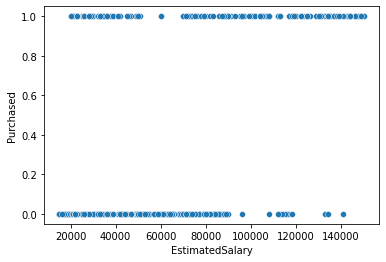

In [47]:
sns.scatterplot(df['EstimatedSalary'],df['Purchased'])

# train test split

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),
                                               df['Purchased'],
                                               test_size=0.3,
                                               random_state=0)



In [49]:
x_train.shape

(280, 2)

In [50]:
x_test.shape

(120, 2)

# standard scalar

In [51]:
#xi-mean/std dev
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_tr_scaled=scaler.transform(x_train)
x_te_scaled=scaler.transform(x_test)

In [54]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [56]:
y_train

92     0
223    1
234    0
232    1
377    0
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 280, dtype: int64

In [53]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [57]:
x_tr_scaled#arrray but values are scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [61]:
x_tr_scaled=pd.DataFrame(x_tr_scaled,columns=x_train.columns)
x_te_scaled=pd.DataFrame(x_te_scaled,columns=x_test.columns)


In [62]:
x_tr_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [65]:
np.round(x_train.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,38.0,69807.0
std,10.0,34641.0
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [67]:
np.round(x_tr_scaled.describe())#mean is 0..our main goal

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


compairing performance of model with scaled and non scaled data

In [70]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lrs=LogisticRegression()

In [71]:
lr.fit(x_train,y_train)
lrs.fit(x_tr_scaled,y_train)

LogisticRegression()

In [72]:
y_pred=lr.predict(x_test)
y_pred_scaled=lrs.predict(x_te_scaled)

In [73]:
from sklearn.metrics import accuracy_score
print("score without scaled values : ",accuracy_score(y_test,y_pred))#65%
print("score with scaled values : ",accuracy_score(y_test,y_pred_scaled))#86%


score without scaled values :  0.6583333333333333
score with scaled values :  0.8666666666666667
